# Feature Engineering 1 

## Example Continuos Variable Creation

[*Andrew Wheeler*, PhD](mailto:andrew.wheeler@hms.com)

This is an example notebook to go along with the lecture Feature Engineering

In [17]:
# Loading in the libraries we will be using
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Our HMS Plotstyle
import sys
sys.path.append(r'C:\Users\e009156\Documents\GitHub\data-science-utils\plt')
import hms_plotstyle
hms_plotstyle.hms_plots()

# My restricted cubic spline function
sys.path.append(r'C:\Users\e009156\Documents\GitHub\data-science-utils\pre_processing\feature_engineering')
from smooth import rcs

# The models from sklearn
import sklearn.linear_model

#Setting the working directory to where our data is stored
os.chdir(r'C:\Users\e009156\Documents\GitHub\data-science-utils\education\Intro_DataScience\Feature_Engineering\Analysis')

#Reading in the Excel data for flipped rates
flip_age = pd.read_excel('Flipped_by_Age.xlsx')

#A quick view of the first few rows of data
flip_age.index.rename('Index', inplace=True)
flip_age

,Age,Flipped,TotalAccounts,PercentFlipped
Index,,,,
0,0,18,239,0.075314
1,1,12,432,0.027778
2,2,10,459,0.021786
3,3,10,423,0.023641
4,4,18,408,0.044118
...,...,...,...,...
76,76,30,256,0.117188
77,77,24,253,0.094862
78,78,10,148,0.067568


,Age,PercentFlipped
Index,,
0,0,0.075314
1,1,0.027778
2,2,0.021786
3,3,0.023641
4,4,0.044118
...,...,...
76,76,0.117188
77,77,0.094862
78,78,0.067568


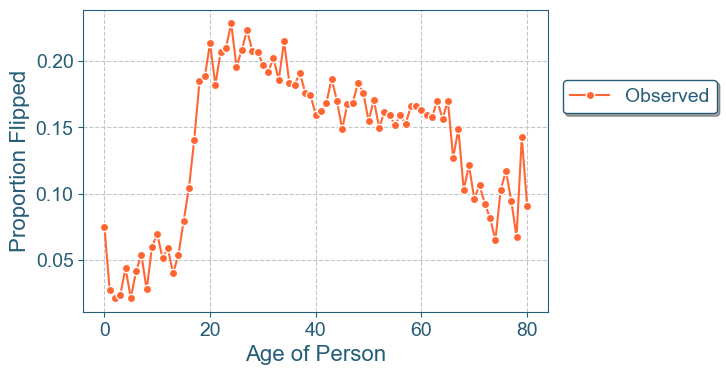

In [18]:
#Making a line plot

def base_plot():
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot('Age','PercentFlipped', data=flip_age, marker='o', markeredgecolor='w', label='Observed')
    ax.set_xlabel('Age of Person')
    ax.set_ylabel('Proportion Flipped')
    return fig, ax

fig, ax = base_plot()
ax.legend(bbox_to_anchor=(1.01,0.8))

flip_age[['Age','PercentFlipped']]

,Age
Index,
0,0
1,1
2,2
3,3
4,4
...,...
76,76
77,77
78,78


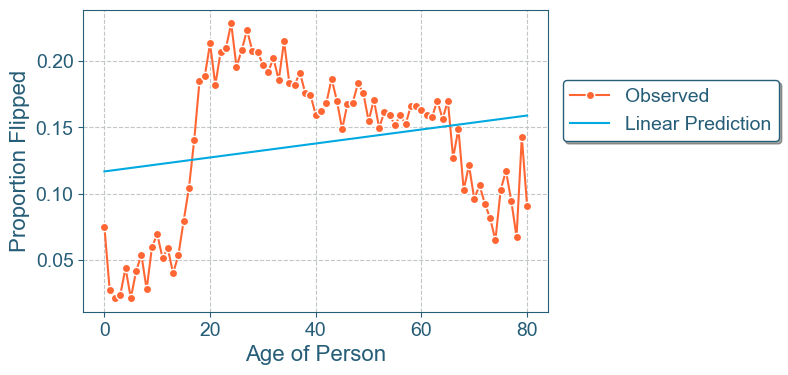

In [19]:
# Fitting a linear function to this line

# Create linear regression object
regr = sklearn.linear_model.LinearRegression()

# Train the simple linear regression
regr.fit(flip_age[['Age']], flip_age['PercentFlipped'])

# Make predictions
flip_age['PredLinear'] = regr.predict(flip_age[['Age']])

# Superimpose on the plot
fig, ax = base_plot()
ax.plot('Age','PredLinear', data=flip_age, label='Linear Prediction')
ax.legend(bbox_to_anchor=(1.01,0.8))

#flip_age.style.hide_index()

#flip_age[['Age']].style.hide_index()
flip_age[['Age']]

,Age,AgeSq,AgeCu
Index,,,
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64
...,...,...,...
76,76,5776,438976
77,77,5929,456533
78,78,6084,474552


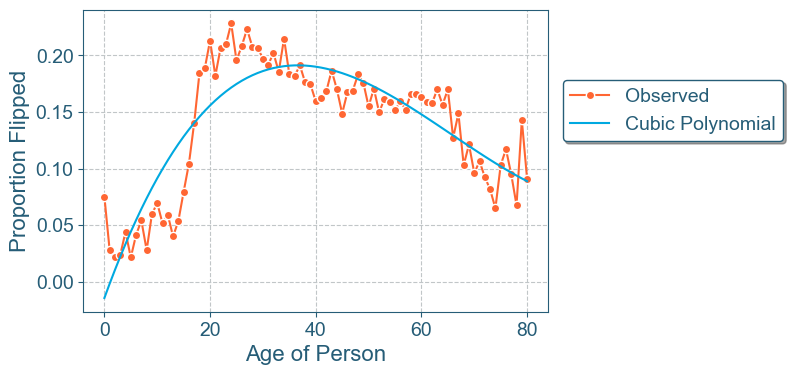

In [20]:
# Create the fields for cubic polynomial model
flip_age['AgeSq'] = flip_age['Age']**2 #often want to scale these, e.g. [(age-40)/80]**2
flip_age['AgeCu'] = flip_age['Age']**3
poly_vars = ['Age','AgeSq','AgeCu']

# Train the linear regression for polynomial variables
regr.fit(flip_age[poly_vars], flip_age['PercentFlipped'])

# Make predictions
flip_age['PredCubic'] = regr.predict(flip_age[poly_vars])

# Superimpose on the plot
fig, ax = base_plot()
ax.plot('Age','PredCubic', data=flip_age, label='Cubic Polynomial')
ax.legend(bbox_to_anchor=(1.01,0.8))

flip_age[poly_vars]

,Age18_65,AgeOver65
Index,,
16,0,0
17,0,0
18,1,0
19,1,0
20,1,0
63,1,0
64,1,0
65,1,0
66,0,1


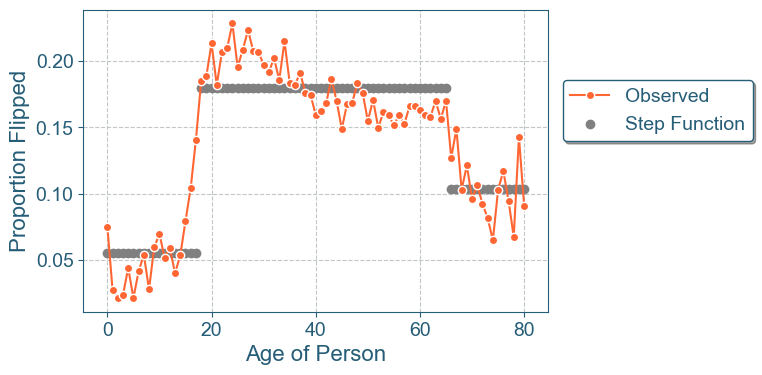

In [21]:
# Model of step functions
flip_age['Age18_65'] = 1* ( (flip_age['Age'] >= 18) & (flip_age['Age'] <= 65) ) 
flip_age['AgeOver65'] = 1* ( flip_age['Age'] > 65 )
step_vars = ['Age18_65','AgeOver65']


# Train the linear regression with step functions
regr.fit(flip_age[step_vars], flip_age['PercentFlipped'])

# Make predictions
flip_age['PredStep'] = regr.predict(flip_age[step_vars])

# Superimpose on the plot
fig, ax = base_plot()
ax.scatter('Age','PredStep', data=flip_age, c='grey', label='Step Function')
ax.legend(bbox_to_anchor=(1.01,0.8))

flip_age.loc[[16,17,18,19,20,63,64,65,66,67],step_vars]

,AgeSpline_1,AgeSpline_2,AgeSpline_3,AgeSpline_4,AgeSpline_5,AgeSpline_6,AgeSpline_7,AgeSpline_8,Age
Index,,,,,,,,,
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,8
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,9
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,10
11,0.000237,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,11
15,0.029586,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,15
16,0.051124,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,16
17,0.081183,0.000237,0.000000,0.000000,0.000000,0.0,0.0,0.0,17
39,5.772544,2.879763,1.623432,0.172544,0.000000,0.0,0.0,0.0,39
40,6.390533,3.271953,1.893491,0.236686,0.000000,0.0,0.0,0.0,40


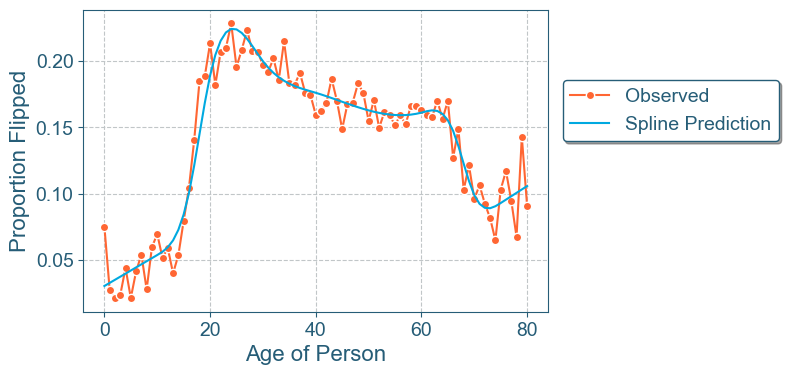

In [22]:
# Fitting a restricted cubic spline function
spline_vars = rcs(flip_age['Age'],knots=[10,16,20,30,40,50,60,66,70,75],stub='AgeSpline_')
spline_vars['Age'] = flip_age['Age']

# Train the linear regression with step functions
regr.fit(spline_vars, flip_age['PercentFlipped'])

# Make predictions
flip_age['PredSpline'] = regr.predict(spline_vars)

# Superimpose on the plot
fig, ax = base_plot()
ax.plot('Age','PredSpline', data=flip_age, label='Spline Prediction')
ax.legend(bbox_to_anchor=(1.01,0.8))

spline_vars.iloc[[8,9,10,11,15,16,17,39,40,41]]